In [1]:
import os

network_path = os.path.join("networks", "FS_SPN_feed_forward-20Hz-oscillating")

input_name = "FS_SPN_feed_forward"
sim_file_gj = os.path.join(network_path, "simulation", f"output-GJ-{input_name}.hdf5")
sim_file_nogj = os.path.join(network_path, "simulation", f"output-noGJ-{input_name}.hdf5")

fig_path = os.path.join(network_path, "figures")

input_config = f"{input_name}-input.json"
duration=3
osc_freq = 20

# Number of cores to use for NEURON
n_cores = 8

modified_network = os.path.join(network_path, "network-synapses-ablated.hdf5")

In [2]:
from snudda.init import SnuddaInit

from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337,
                 snudda_data="../../../../BasalGangliaData/data/")
# To get only FS density we would use 0.013*80500, but then we also have dSPN and iSPN here in network
# so we need to compensate to get the correct FS neuron density (which is the important part)

num_FS = 400
num_dSPN_orig = 800
num_iSPN_orig = 800
num_dSPN_final = 40
num_iSPN_final = 40

cnc.define_striatum(num_dSPN=num_dSPN_orig, num_iSPN=num_iSPN_orig, num_FS=num_FS, num_LTS=0, num_ChIN=0,
                    volume_type="cube", neuron_density=0.013*80500*(1 + (num_dSPN_orig + num_iSPN_orig)/num_FS))
cnc.add_population_unit_random("Striatum", "FS", 1.0, 1)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Writing networks/FS_SPN_feed_forward-20Hz-oscillating/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_SPN_feed_forward-20Hz-oscillating/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, verbose=False)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_SPN_feed_forward-20Hz-oscillating/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 488/1100 (1186 neurons)
Processing hyper voxel : 378/1100 (963 neurons)
Processing hyper voxel : 487/1100 (913 neurons)
Processing hyper voxel : 477/1100 (897 neurons)
Processing hyper voxel : 377/1100 (747 neurons)
Processing hyper voxel : 367/1100 (712 neurons)
Processing hyper voxel : 499/1100 (692 neurons)
Processing hyper voxel : 476/1100 (683 neurons)
Processing hyper voxel : 489/1100 (652 neurons)
Processing hyper voxel : 598/1100 (624 neurons)
Processing hyper voxel : 389/1100 (576 neurons)
Processing hyper voxel : 366/1100 (571 neurons)
Processing hyper voxel : 498/1100 (525 neurons)
Processing hyper voxel : 379/1100 (521 neurons)
Processing hyper voxel : 597/1100 (495 neurons)
Processing hyper voxel : 478/1100 (447 neurons)
Processing hyper voxel : 587/1100 (442 neurons)

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Worker synapses: 1/1909120 (heap size: 89)
Worker synapses: 1909120/1909120 (heap size: 0)
Read 1909120 out of total 1909120 synapses
Read 8691 out of total 8691 gapJunctions


### Ablating network
It is important that the SPN networks receive a full set of FS inputs, so we want to only keep the SPN that are in the core.

In [6]:
from snudda.utils import SnuddaLoad
from snudda.utils.ablate_network import SnuddaAblateNetwork
mod_network = SnuddaAblateNetwork(network_file=os.path.join(network_path, "network-synapses.hdf5"))
orig_sl = SnuddaLoad(network_path)
orig_fs_id = orig_sl.get_neuron_id_of_type("FS")
orig_dspn_id = [x for x, y in orig_sl.get_centre_neurons_iterator(neuron_type="dSPN", n_neurons=num_dSPN_final)]
orig_ispn_id = [x for x, y in orig_sl.get_centre_neurons_iterator(neuron_type="iSPN", n_neurons=num_iSPN_final)]

keep_id = set(list(orig_fs_id) + list(orig_dspn_id) + list(orig_ispn_id)) 
mod_network.only_keep_neuron_id(keep_id)
mod_network.write_network(modified_network)

Loading 2000 neurons with 138153 synapses and 1933 gap junctions
Loading 2000 neurons with 138153 synapses and 1933 gap junctions
Writing to networks/FS_SPN_feed_forward-20Hz-oscillating/network-synapses-ablated.hdf5
Copying morphologies
Keeping 480 neurons.
0/138153 synapses processed
138153/138153 synapses processed
Filtering done.
0/1933 synapses processed
1933/1933 synapses processed
Filtering done.
Copying synapses and gap junctions
11940 / 11940 synapse rows parsed
Synapse matrix written.
Keeping 11940 synapses (out of 138153)
0 / 1933 gap junction rows parsed
1933 / 1933 gap junction rows parsed
Gap junction matrix written.
Keeping 1933  gap junctions (out of 1933)


Loading 480 neurons with 11940 synapses and 1933 gap junctions
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_SPN_feed_forward-20Hz-oscillating/network-config.json


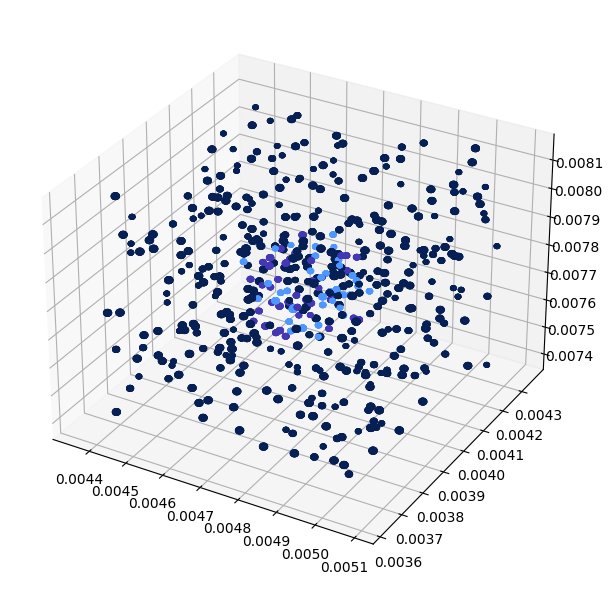

(<module 'matplotlib.pyplot' from '/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>,
 <Axes3DSubplot:>)

In [7]:
from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(modified_network)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)

In [8]:
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path,
                 hdf5_network_file=modified_network,
                 input_config_file=f"{input_name}-input.json",
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_SPN_feed_forward-20Hz-oscillating/network-config.json
Loading 480 neurons with 11940 synapses and 1933 gap junctions
!!! Warning, combining definition of cortical_background input for neuron FS_0 0 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_2 1 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_3 2 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_3 3 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_3 4 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_3 5 (meta modified by input_config)
!!! Warning, combining definition of cortical_background input for neuron FS_0 6 (meta modified by input_config)
!!! Warning, combini

Loading 480 neurons with 11940 synapses and 1933 gap junctions


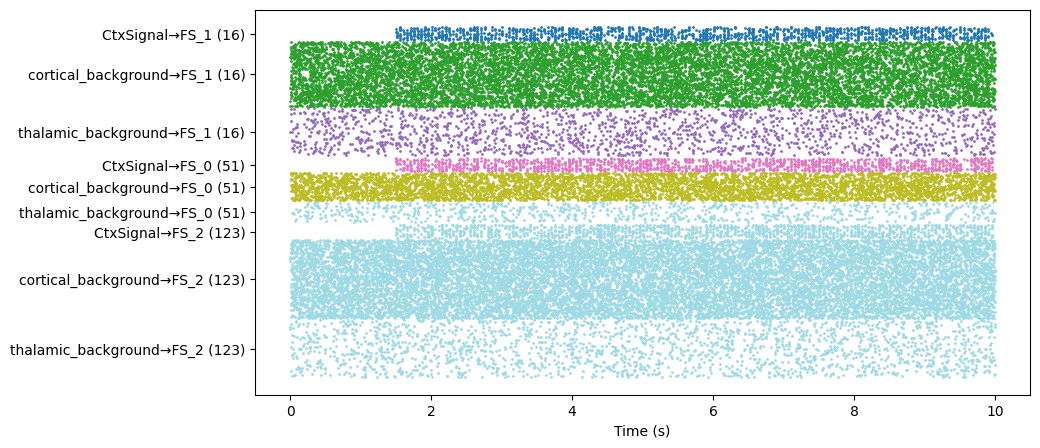

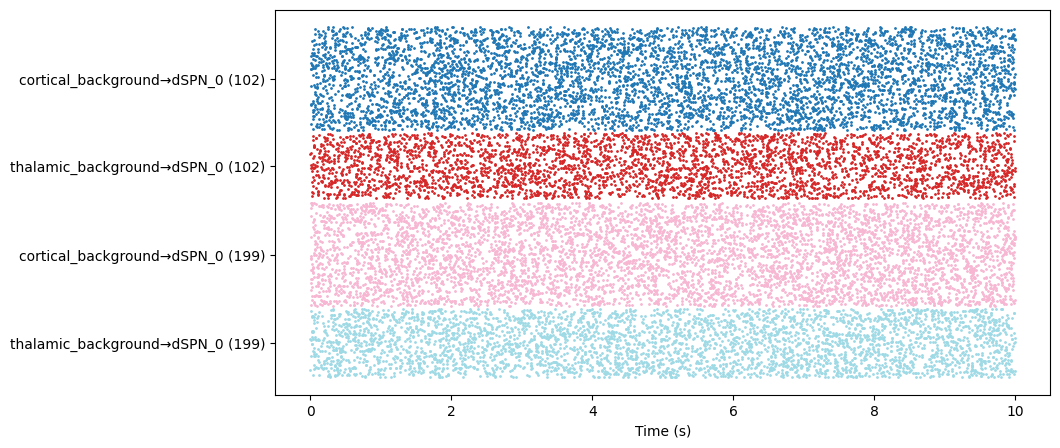

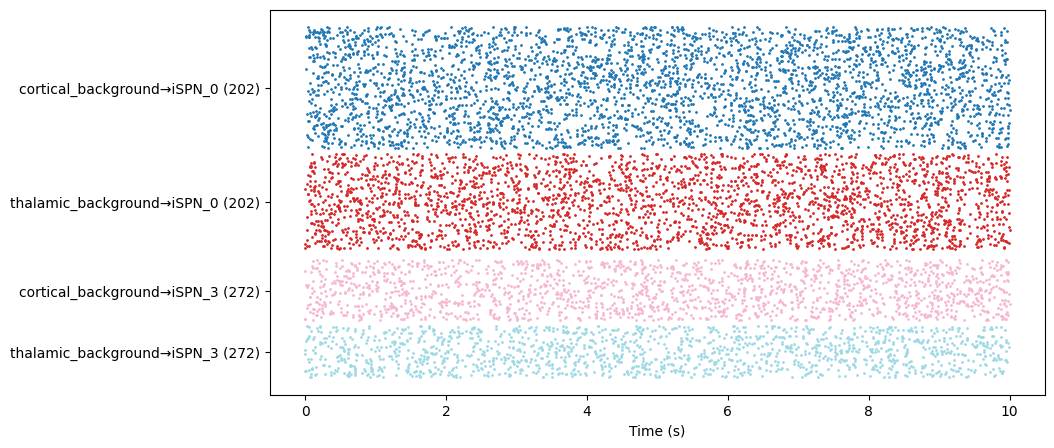

In [9]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path=modified_network)
spi.plot_input(neuron_type="FS", num_neurons=3)
spi.plot_input(neuron_type="dSPN", num_neurons=2)
spi.plot_input(neuron_type="iSPN", num_neurons=2)

In [ ]:
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network} --time {duration} --outputFile {sim_file_gj}")

numprocs=8
Creating missing directory networks/FS_SPN_feed_forward-20Hz-oscillating/simulation
Created directory networks/FS_SPN_feed_forward-20Hz-oscillating/simulation
Using input file networks/FS_SPN_feed_forward-20Hz-oscillating/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/FS_SPN_feed_forward-20Hz-oscillating/network-config.json
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', path='networks/FS_SPN_feed_forward-20Hz-oscillating', network_file='networks/FS_SPN_feed_forward-20Hz-oscillating/network-synapses-ablated.hdf5', input_file=None, output_file='networks/FS_SPN_feed_forward-20Hz-oscillating/simulation/output-GJ-FS_SPN_feed_forward.hdf5', time=3.0, snudda_data=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=False, disable_gj=Fals

In [ ]:
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network} --time {duration} --outputFile {sim_file_nogj} --disableGJ")

### Figures

In [ ]:
from snudda.utils import SnuddaLoad
from snudda.utils import SnuddaLoadNetworkSimulation

sl = SnuddaLoad(modified_network)
sls_gj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_gj)
sls_nogj = SnuddaLoadNetworkSimulation(network_simulation_output_file=sim_file_nogj)

n_centre=10

nid_fs = [x for x,y in sl.get_centre_neurons_iterator(n_neurons=n_centre, neuron_type="FS")]
nid_dspn = [x for x,y in sl.get_centre_neurons_iterator(n_neurons=n_centre, neuron_type="dSPN")]
nid_ispn = [x for x,y in sl.get_centre_neurons_iterator(n_neurons=n_centre, neuron_type="iSPN")]

In [ ]:
%matplotlib inline

from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file=sim_file_gj, network_file=modified_network)
# Use trace_id to specify which traces
ax = pt.plot_traces(offset=0, time_range=(2,2.5),fig_size=(10,4))

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
pt2 = PlotTraces(output_file=sim_file_nogj, network_file=modified_network)
ax2 = pt2.plot_traces(offset=0, time_range=(2,2.5),fig_size=(10,4))

In [ ]:
from snudda.plotting import SnuddaPlotSpikeRaster2
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=modified_network,
                             simulation_file=sim_file_gj,
                             snudda_load=sl, snudda_simulation_load=sls_gj)
time_range = (1,3)
fig_name_ph_gj = f"Period-histogram-{input_name}-GJ.png"
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_fs, period=1/osc_freq, time_range=time_range, label="FS", color=spr.get_colours("FS"), show_figure=False,
                                         exclude_depolarisation_blocked_neurons=True, save_figure=False)
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_dspn, period=1/osc_freq, time_range=time_range, label="dSPN", ax=ax, color=spr.get_colours("dSPN"), show_figure=False,
                                        exclude_depolarisation_blocked_neurons=True, save_figure=False)
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_ispn, period=1/osc_freq, time_range=time_range, label="iSPN", ax=ax, color=spr.get_colours("iSPN"),
                                        exclude_depolarisation_blocked_neurons=True, fig_file=fig_name_ph_gj)

In [ ]:
fig_name_sh_gj = f"{input_name}-spike-histogram-GJ.png"
spr.plot_spike_histogram_type(["FS", "dSPN", "iSPN"], bin_size=200e-3, n_core=10, fig_file=fig_name_sh_gj, linestyle="-")

In [ ]:
from snudda.plotting import SnuddaPlotSpikeRaster2
spr2 = SnuddaPlotSpikeRaster2(network_path=network_path, 
                              network_file=modified_network,
                              simulation_file=sim_file_nogj,
                              snudda_load=sl, snudda_simulation_load=sls_nogj)

fig_name_ph_nogj = f"Period-histogram-{input_name}-noGJ.png"
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_fs, period=1/osc_freq, time_range=time_range, label="FS", color=spr.get_colours("FS"), show_figure=False,
                                          exclude_depolarisation_blocked_neurons=True, save_figure=False, fig_size=(8,6))
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_dspn, period=1/osc_freq, time_range=time_range, label="dSPN", ax=ax, color=spr.get_colours("dSPN"), show_figure=False,
                                         exclude_depolarisation_blocked_neurons=True, save_figure=False)
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_ispn, period=1/osc_freq, time_range=time_range, label="iSPN", ax=ax, color=spr.get_colours("iSPN"),
                                         exclude_depolarisation_blocked_neurons=True, fig_file=fig_name_ph_nogj)

In [ ]:
fig_name_sh_nogj = f"{input_name}-spike-histogram-noGJ.png"

spr2.plot_spike_histogram_type(["FS", "dSPN", "iSPN"], bin_size=200e-3, fig_file=fig_name_sh_nogj, linestyle="--", legend_loc="lower right", fig_size=(8,6))

Comparing with and without gap junctions

In [ ]:
fig_name_ph = f"Period-histogram-{input_name}-summary.png"
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_fs, period=1/osc_freq, time_range=time_range, label="FS GJ", color=spr.get_colours("FS"), show_figure=False, fig_size=(10,10),
                                         exclude_depolarisation_blocked_neurons=True, save_figure=False, linestyle="-")
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_dspn, period=1/osc_freq, time_range=time_range, label="dSPN GJ", ax=ax, color=spr.get_colours("dSPN"), show_figure=False,
                                        exclude_depolarisation_blocked_neurons=True, save_figure=False, linestyle="-")
ax, _, _ = spr.plot_period_histogram_mod(neuron_id=nid_ispn, period=1/osc_freq, time_range=time_range, label="iSPN GJ", ax=ax, color=spr.get_colours("iSPN"), show_figure=False,
                                        exclude_depolarisation_blocked_neurons=True, save_figure=False, linestyle="-")
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_fs, period=1/osc_freq, time_range=time_range, label="FS no GJ", ax=ax, color=spr.get_colours("FS"), show_figure=False,
                                          exclude_depolarisation_blocked_neurons=True, save_figure=False, linestyle="--")
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_dspn, period=1/osc_freq, time_range=time_range, label="dSPN no GJ", ax=ax, color=spr.get_colours("dSPN"), show_figure=False,
                                         exclude_depolarisation_blocked_neurons=True, save_figure=False, linestyle="--")
ax, _, _ = spr2.plot_period_histogram_mod(neuron_id=nid_ispn, period=1/osc_freq, time_range=time_range, label="iSPN no GJ", ax=ax, color=spr.get_colours("iSPN"),
                                         exclude_depolarisation_blocked_neurons=True, fig_file=fig_name_ph, linestyle="--")

In [ ]:
fig_file_raster_gj = f"{input_name}-spike-raster-GJ.png"
fig_file_raster_nogj = f"{input_name}-spike-raster-noGJ.png"

time_range_zoom = (2.5,3)

spr.plot_spike_raster(fig_file=fig_file_raster_gj, time_range=time_range_zoom)
spr2.plot_spike_raster(fig_file=fig_file_raster_nogj, time_range=time_range_zoom)

In [ ]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram

fig_file_fs=os.path.join(fig_path, f"{input_name}-shuffle-corrected-cross-correlogram-FS.png")
fig_file_dspn=os.path.join(fig_path, f"{input_name}-shuffle-corrected-cross-correlogram-dSPN.png")
fig_file_ispn=os.path.join(fig_path, f"{input_name}-shuffle-corrected-cross-correlogram-iSPN.png")

pcc = PlotCrossCorrelogram(simulation_file=sim_file_gj, snudda_simulation_load=sls_gj)
pcc2 = PlotCrossCorrelogram(simulation_file=sim_file_nogj, snudda_simulation_load=sls_nogj)

fs_colour = spr.get_colours("FS")
dspn_colour = spr.get_colours("dSPN")
ispn_colour = spr.get_colours("iSPN")

# Pick centre FS only, use same number as for dSPN
nid_fs_center = [x for x, y in sl.get_centre_neurons_iterator(neuron_type="FS", n_neurons=len(nid_dspn))]

n_bins= 41
width = 20e-3

ax = pcc.plot_all_pair_cross_correlogram(neuron_id=nid_fs_center, show_figure=False, linestyle="-", label="FS GJ", colour=fs_colour, n_bins=n_bins, width=width, fig_size=(9,7))
pcc2.plot_all_pair_cross_correlogram(neuron_id=nid_fs_center, show_figure=True, linestyle="--", ax=ax, label="FS no GJ", fig_file_name=fig_file_fs, colour=fs_colour, n_bins=n_bins, width=width)

ax = pcc.plot_all_pair_cross_correlogram(neuron_id=nid_dspn, show_figure=False, linestyle="-", label="dSPN GJ", colour=dspn_colour, n_bins=n_bins, width=width, fig_size=(9,7))
pcc2.plot_all_pair_cross_correlogram(neuron_id=nid_dspn, show_figure=True, linestyle="--", ax=ax, label="dSPN no GJ", fig_file_name=fig_file_dspn, colour=dspn_colour, n_bins=n_bins, width=width)

ax = pcc.plot_all_pair_cross_correlogram(neuron_id=nid_ispn, show_figure=False, linestyle="-", label="iSPN GJ", colour=ispn_colour, n_bins=n_bins, width=width, fig_size=(9,7))
pcc2.plot_all_pair_cross_correlogram(neuron_id=nid_ispn, show_figure=True, linestyle="--", ax=ax, label="iSPN no GJ", fig_file_name=fig_file_ispn, colour=ispn_colour, n_bins=n_bins, width=width)